In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [21]:
df = pd.read_excel('./data/customer.xlsx', index_col=0)

In [20]:
df.head()

,age,salary,purchased
gender,,,
Male,19,19000,0
Male,35,20000,0
Female,26,43000,0
Female,27,57000,0
Male,19,76000,0


<AxesSubplot:xlabel='age', ylabel='salary'>

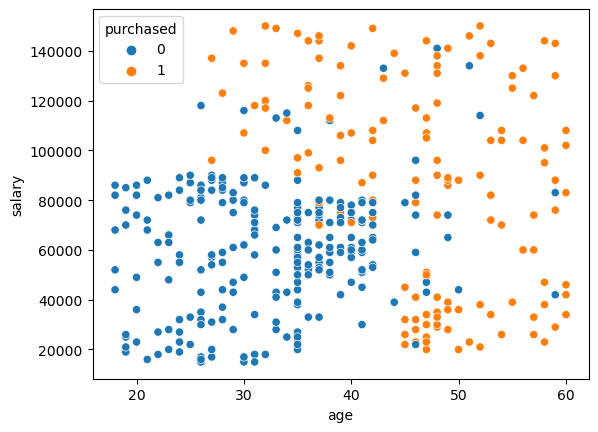

In [31]:
# อายุ รายได้ จะซื้อหรือไม่
sns.scatterplot(data=df, x='age', y='salary', hue='purchased')

รำข้อมูลทั้งหมดไป Tran ทั้งหมด


c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:xlabel='age', ylabel='salary'>

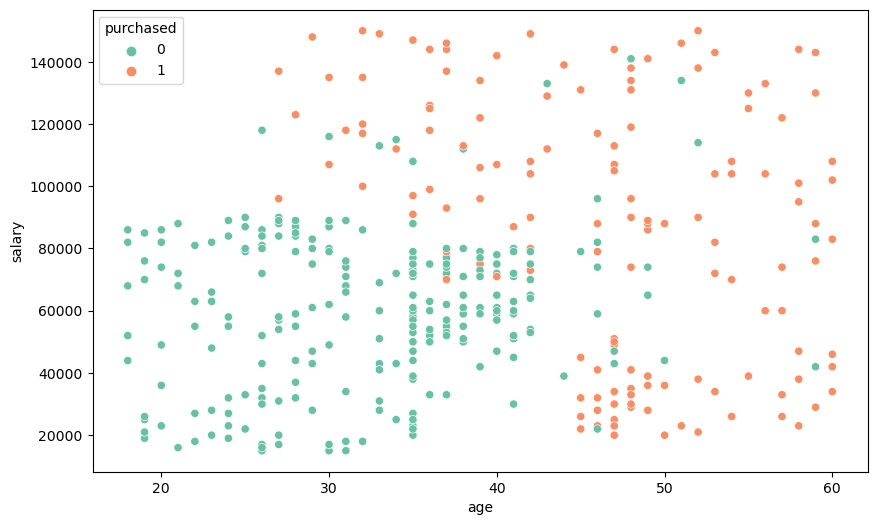

In [88]:
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_excel('./data/customer.xlsx')
x = df[['age', 'salary']]
y = df['purchased']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)
knn.score(x, y)

# figuare size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x['age'], y=x['salary'] , hue=y, palette='Set2')


[1]


c:\Users\puemm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


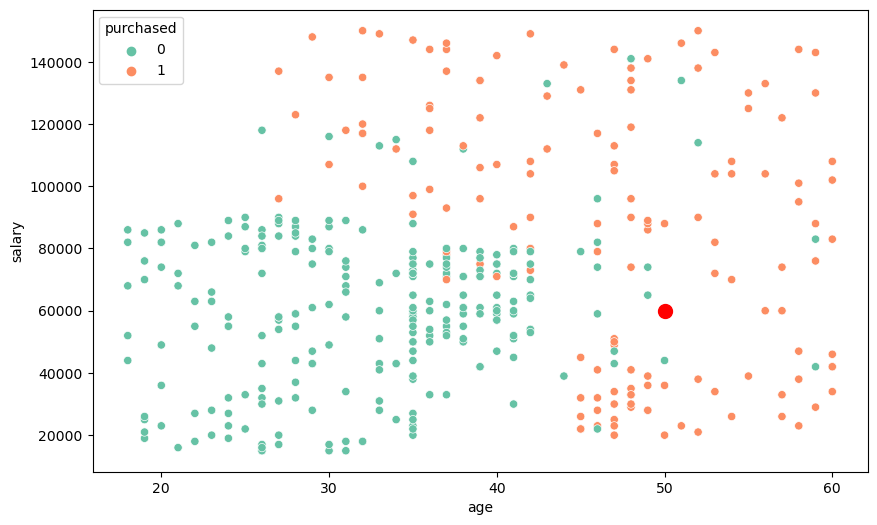

In [87]:
print(knn.predict([[50, 60000]]))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x['age'], y=x['salary'] , hue=y, palette='Set2')
plt.scatter(50, 60000, color='red', s=100)


แบ่งเป็น Train กับ Test


78.75


c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:xlabel='age', ylabel='salary'>

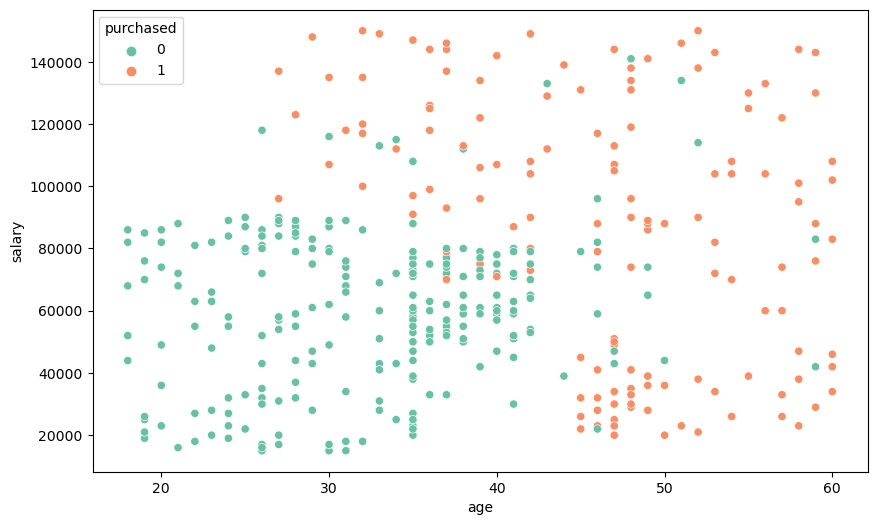

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_excel('./data/customer.xlsx')
x = df[['age', 'salary']]
y = df['purchased']


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
print(knn.score(x_test, y_test)*100)

# figuare size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x['age'], y=x['salary'] , hue=y, palette='Set2')


In [122]:
y_pre = knn.predict(x_test)
x_test # ข้อมูลที่จะทำนาย

c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,age,salary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


In [121]:
y_test # คำตอบที่ถูกต้อง

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: purchased, Length: 80, dtype: int64

In [127]:
# สร้าง DataFrame ขึ้นมาเพื่อเก็บค่า y_test และค่าที่ทำนายได้
# โดย y_test จะเป็นคำตอบที่ถูกต้อง
# และค่าที่ทำนายได้จะเป็นคำตอบที่ทำนายได้จากโมเดล
df2 = pd.DataFrame(data=y_test)
df2['predict'] = knn.predict(x_test)
# score คือ ค่าที่ทำนายได้
print(f"ค่าที่ทำนายได้ = {knn.score(x_test, y_test)*100} %")
print(df2.to_string())

ค่าที่ทำนายได้ = 78.75 %
     purchased  predict
132          0        0
309          0        0
341          0        0
196          0        0
246          0        0
60           0        1
155          0        0
261          1        1
141          0        0
214          0        0
37           0        0
134          0        0
113          0        0
348          0        0
12           0        0
59           0        1
293          0        0
140          0        0
206          1        1
199          0        0
176          0        0
268          1        1
124          0        0
344          1        1
175          0        0
313          1        1
78           0        0
15           0        0
286          0        0
102          0        0
170          0        1
303          1        0
334          1        0
225          0        0
65           0        0
76           0        0
90           0        0
173          0        0
179          0        1
399          1 

c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

StanderScaler ทำให้ข้อมูลอยู่ใน range ที่เดียวกัน

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('./data/customer.xlsx')

x = df[['age', 'salary']]
y = df['purchased']

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

# standard
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
model.score(x_test, y_test)

c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.95

[0]


c:\Users\puemm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\puemm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


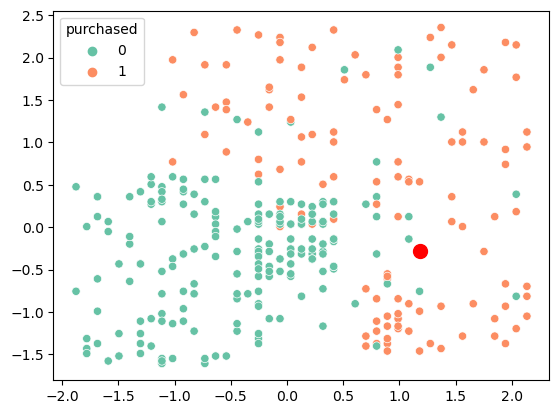

In [142]:
x_scaler = scaler.transform([[50, 60000]])
print(model.predict(x_scaler))
sns.scatterplot(x=x_train[:,0], y=x_train[:,1] , hue= y_train, palette='Set2')
plt.scatter(x_scaler[:,0], x_scaler[:,1], color='red', s=100)